# 向量机SVM模型

SVM可以用于离散因变量的分类和连续因变量的预测

SVM将低维线性不可分的空间转换为高维的线性可分空间

## 分类问题

线性可分SVM模型：

LinearSVC(penalty='l2',loss='squared_hinge',dual=True,tol=0.0001,C=1.0,multi_class='ovr',fit_intercept=True,intercept_scaling=1,
         class_weight=None,verbose=0,random_state=None,max_iter=1000)

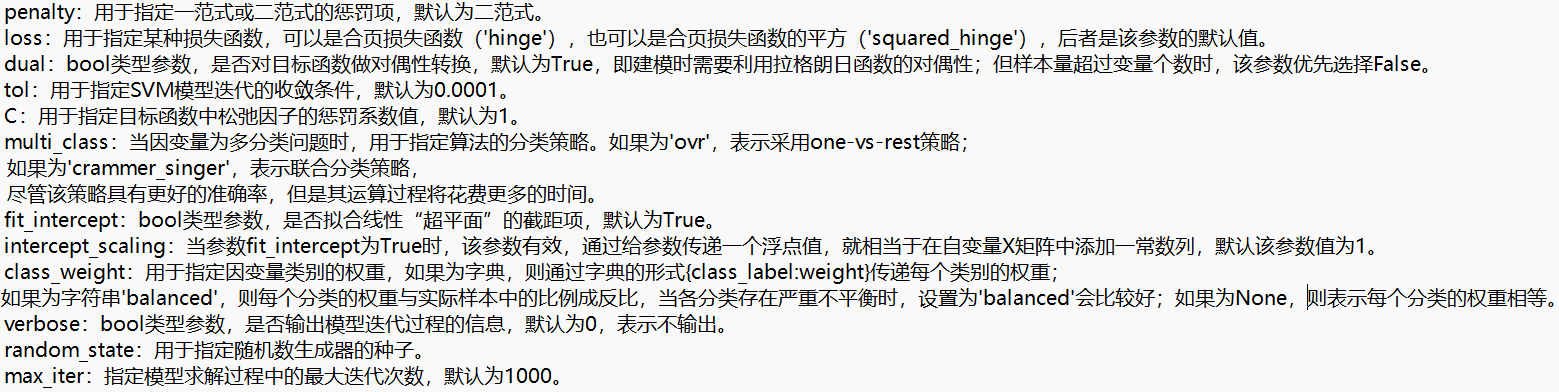

非线性可分SVM模型：

SVC(C=1.0,kernel='rbf',degree=3,gamma='auto',coef0=0.0,shrinking=True,probability=False,tol=0.001,cache_size=200,
class_weight=None,verbose=False,max_iter=-1,decision_function_shape='ovr,random_state=None)

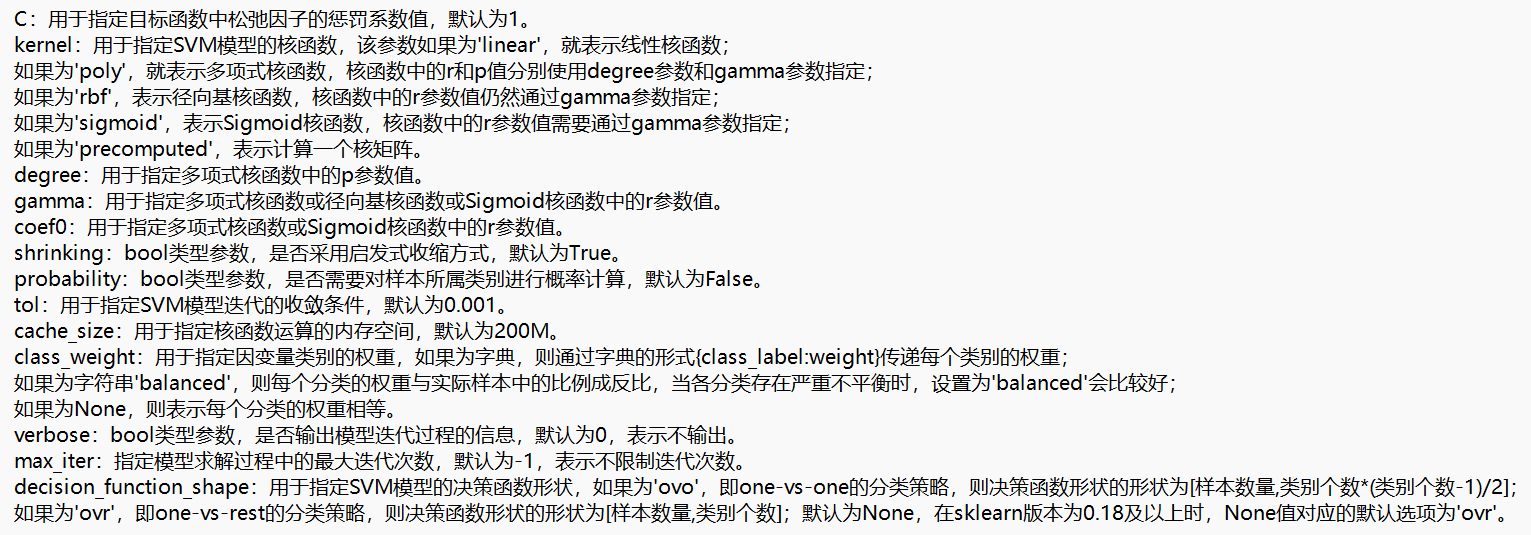

## 回归问题

svm.LinearSVR(epsilon=0.0,tol=0.0001,C=1.0,loss='epsilon_insensitive',fit_intercept=True,intercept_scaling=1.0,dual=True,
verbose=0,random_state=None,max_iter=1000)

svm.SVR(kernel='rbf',degree=3,gamma='auto',coef0=0.0,tol=0.001,C=1.0,epsilon=0.1,shrinking=True,cache_size=200,verbose=False,max_iter=-1)

   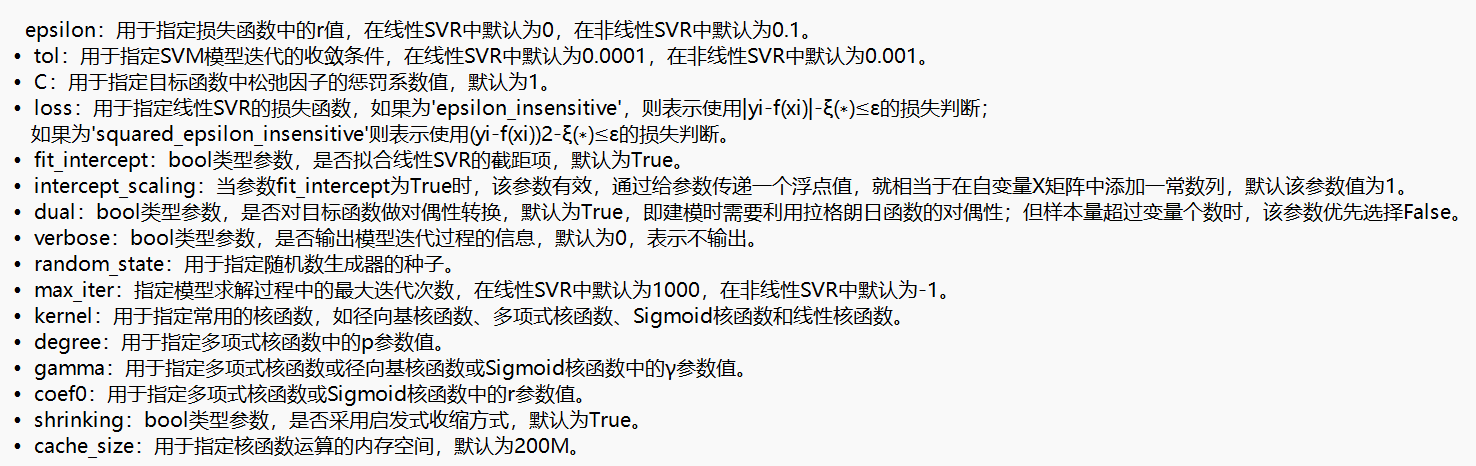

# 分类问题解决

In [1]:
import pandas as pd
from sklearn import svm,model_selection,metrics

In [2]:
letters = pd.read_csv("letterdata.csv")

In [3]:
letters

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
#把数据拆分成训练集和测试集
predictors = letters.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(letters[predictors],letters.letter,test_size=0.25,random_state=1234)

In [5]:
#使用网格搜索法，选择线性可分SVM类中的最佳C值
C = [0.05,0.1,0.5,1,2,5]
parameters={'C':C}
grid_linear_svc = model_selection.GridSearchCV(estimator = svm.LinearSVC(),param_grid = parameters,scoring='accuracy',cv=5,verbose=1)

In [6]:
#模型在训练数据集上的拟合
grid_linear_svc.fit(X_train,y_train)
#返回交叉验证后的最佳参数值
grid_linear_svc.best_params_,grid_linear_svc.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, in

({'C': 0.1}, 0.6909333333333334)

In [7]:
#模型在测试集上的预测
pred_linear_svc = grid_linear_svc.predict(X_test)
#模型的预测准确率
metrics.accuracy_score(y_test,pred_linear_svc)

0.7152

都比较低，说明线性可分SVM模型不太适合该数据集的拟合和预测

所以我再用非线性SVM模型对该数据集进行重新建模

In [8]:
#使用网格搜索法，选择非线性可分SVM类中的最佳C值和核函数
kernel = ['rbf','linear','poly','sigmod']
C=[0.1,0.5,1,2,5]
parameters = {'kernel':kernel,'C':C}
grid_svc = model_selection.GridSearchCV(estimator = svm.SVC(),
                                       param_grid = parameters,
                                       scoring='accuracy',cv=5,verbose=1)

In [9]:
#模型在训练数据集上拟合
grid_svc.fit(X_train,y_train)
#返回交叉验证后的最佳参数值
grid_svc.best_params_,grid_svc.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


D:\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 173, in sklearn.svm._libsvm.fit
ValueError: 'sigmod' is not in list

  warnings.w

({'C': 5, 'kernel': 'rbf'}, 0.9516666666666665)

In [10]:
#模型在测试集上的预测
pred_svc = grid_svc.predict(X_test)
#模型的预测准确率
metrics.accuracy_score(y_test,pred_svc)

0.9596

# 预测问题的解决

In [11]:
forestfires = pd.read_csv('forestfires.csv')

In [12]:
forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [13]:
#删除day变量
forestfires.drop(columns='day',axis=1,inplace=True)

In [14]:
forestfires

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [15]:
#把月份数值化处理
forestfires.month = pd.factorize(forestfires.month)[0]

In [16]:
forestfires

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,2,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,2,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,2,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


D:\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


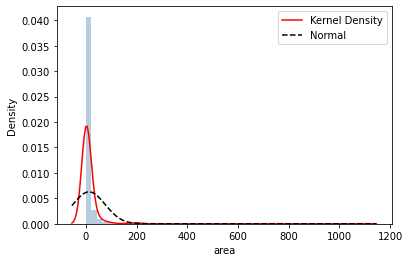

In [17]:
#看一下area变量的分布
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#绘制森林烧毁面积的直方图
sns.distplot(forestfires.area,bins=50,kde=True,fit=norm,
            hist_kws = {'color':'steelblue'},
            kde_kws = {'color':'red','label':'Kernel Density'},
            fit_kws = {'color':'black','label':'Normal','linestyle':'--'})
plt.legend()
plt.show()

这个右偏的好严重，我觉得得处理一下area

In [18]:
from sklearn import preprocessing
import numpy as np
#对area做对数变换
y = np.log1p(forestfires.area)   #log1p = log(x+1)
#将X变量做标准化处理
predictors = forestfires.columns[:-1]
X = preprocessing.scale(forestfires[predictors])

In [21]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [22]:
X

array([[ 1.00831277,  0.56986043, -1.47732404, ...,  0.41172435,
         1.49861442, -0.07326831],
       [ 1.00831277, -0.24400101, -0.96125881, ..., -0.69245628,
        -1.74175564, -0.07326831],
       [ 1.00831277, -0.24400101, -0.96125881, ..., -0.69245628,
        -1.51828184, -0.07326831],
       ...,
       [ 1.00831277, -0.24400101, -0.44519359, ...,  1.57724834,
         1.49861442, -0.07326831],
       [-1.58736044, -0.24400101, -0.44519359, ..., -0.14036597,
        -0.00983371, -0.07326831],
       [ 0.57570057, -1.05786246,  4.19939339, ..., -0.81514302,
         0.26950853, -0.07326831]])

In [23]:
#把数据拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 1234)

In [24]:
#构建默认参数的SVM回归模型
svr = svm.SVR()

In [25]:
#模型在训练数据集上的拟合
svr.fit(X_train,y_train)

SVR()

In [26]:
#模型在测试上的预测
pred_svr = svr.predict(X_test)

In [27]:
#计算模型的MSE
metrics.mean_squared_error(y_test,pred_svr)

1.9268192310372876

#使用网格搜索法选择SVM中的最佳C值、epsilon值和gamma值

In [29]:
epsilon = np.arange(0.1,1.5,0.2)
C = np.arange(100,1000,200)
gamma = np.arange(0.001,0.01,0.002)
parameters = {'epsilon':epsilon,'C':C,'gamma':gamma}
grid_svr = model_selection.GridSearchCV(estimator=svm.SVR(),param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=2)

In [30]:
#模型在训练数据集上的拟合
grid_svr.fit(X_train,y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': array([100, 300, 500, 700, 900]),
                         'epsilon': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]),
                         'gamma': array([0.001, 0.003, 0.005, 0.007, 0.009])},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
#返回交叉验证后的最佳参数值
print(grid_svr.best_params_,grid_svr.best_score_)

{'C': 300, 'epsilon': 1.1000000000000003, 'gamma': 0.001} -1.9946668196316621


In [32]:
#模型在测试集上的预测
pred_grid_svr = grid_svr.predict(X_test)
#计算模型在测试集上的MSE值
metrics.mean_squared_error(y_test,pred_grid_svr)

1.7455012238826595

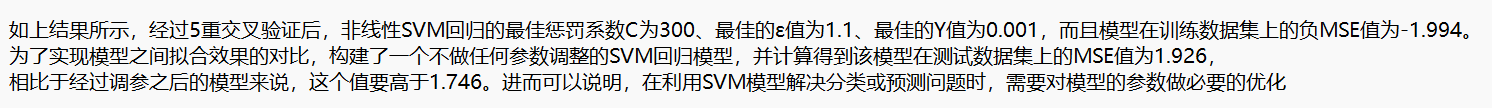

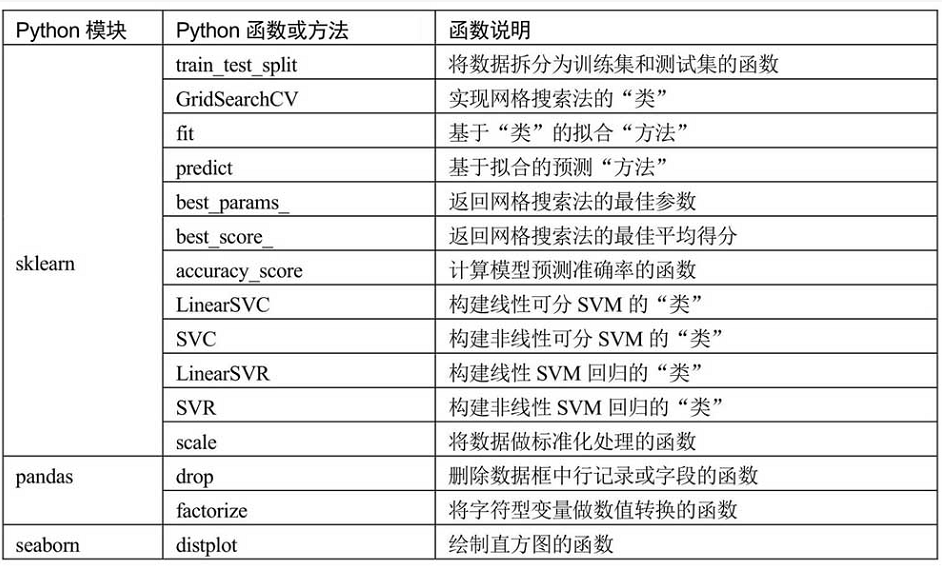